In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import os
import torch
os.chdir('/home/ubuntu/Masters_Thesis/scripts')
from data_modelling.NN_Training import TrainNNModel
from utilities.data_preparation import PrepareModellingData
from utilities.visualisation import *
import matplotlib.pyplot as plt
device = torch.device("cuda")

from matplotlib import font_manager
font_dirs = ['/home/ubuntu/Masters_Thesis/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
# get training and testing data
feature = 'roberta_processed_data_sentiment_score'
data_dict = PrepareModellingData.load_data_wo_bots(dataset_no=1, weighted_score='user_weighted')
data = data_dict['30T'][1]
X, y = PrepareModellingData(sentiment_past = 30, price_past = 30, time_forecast = 0).get_modelling_data_and_output_for_regression(data, feature, '30T', 'close')

In [3]:
train_class = TrainNNModel(X, y, 64)
# The X_test and y_test are standardized
train_class.make_dataloader()
testloader = train_class.testloader
X_test_df = train_class.X_test_df
y_test_df = train_class.y_test_df
x_scaler = train_class.x_scaler
y_scaler= train_class.y_scaler

In [4]:
def get_predictions(network_name, sentiment_past, price_past, time_forecast, processed):
    # load the model
    path = f'/home/ubuntu/Masters_Thesis/results/final_models/{network_name}_{feature}_processed_{processed}_SPT_{sentiment_past}_{price_past}_{time_forecast}.pt'
    network = torch.load(path)
    network.eval()
    
    if time_forecast!=0:
        forecasting = True
    else:
        forecasting = False
    
    #make the visualisation
    plot_regression_network_output(network, X_test_df, y_test_df, x_scaler, y_scaler, forecasting = forecasting, forecasting_period = time_forecast)
    

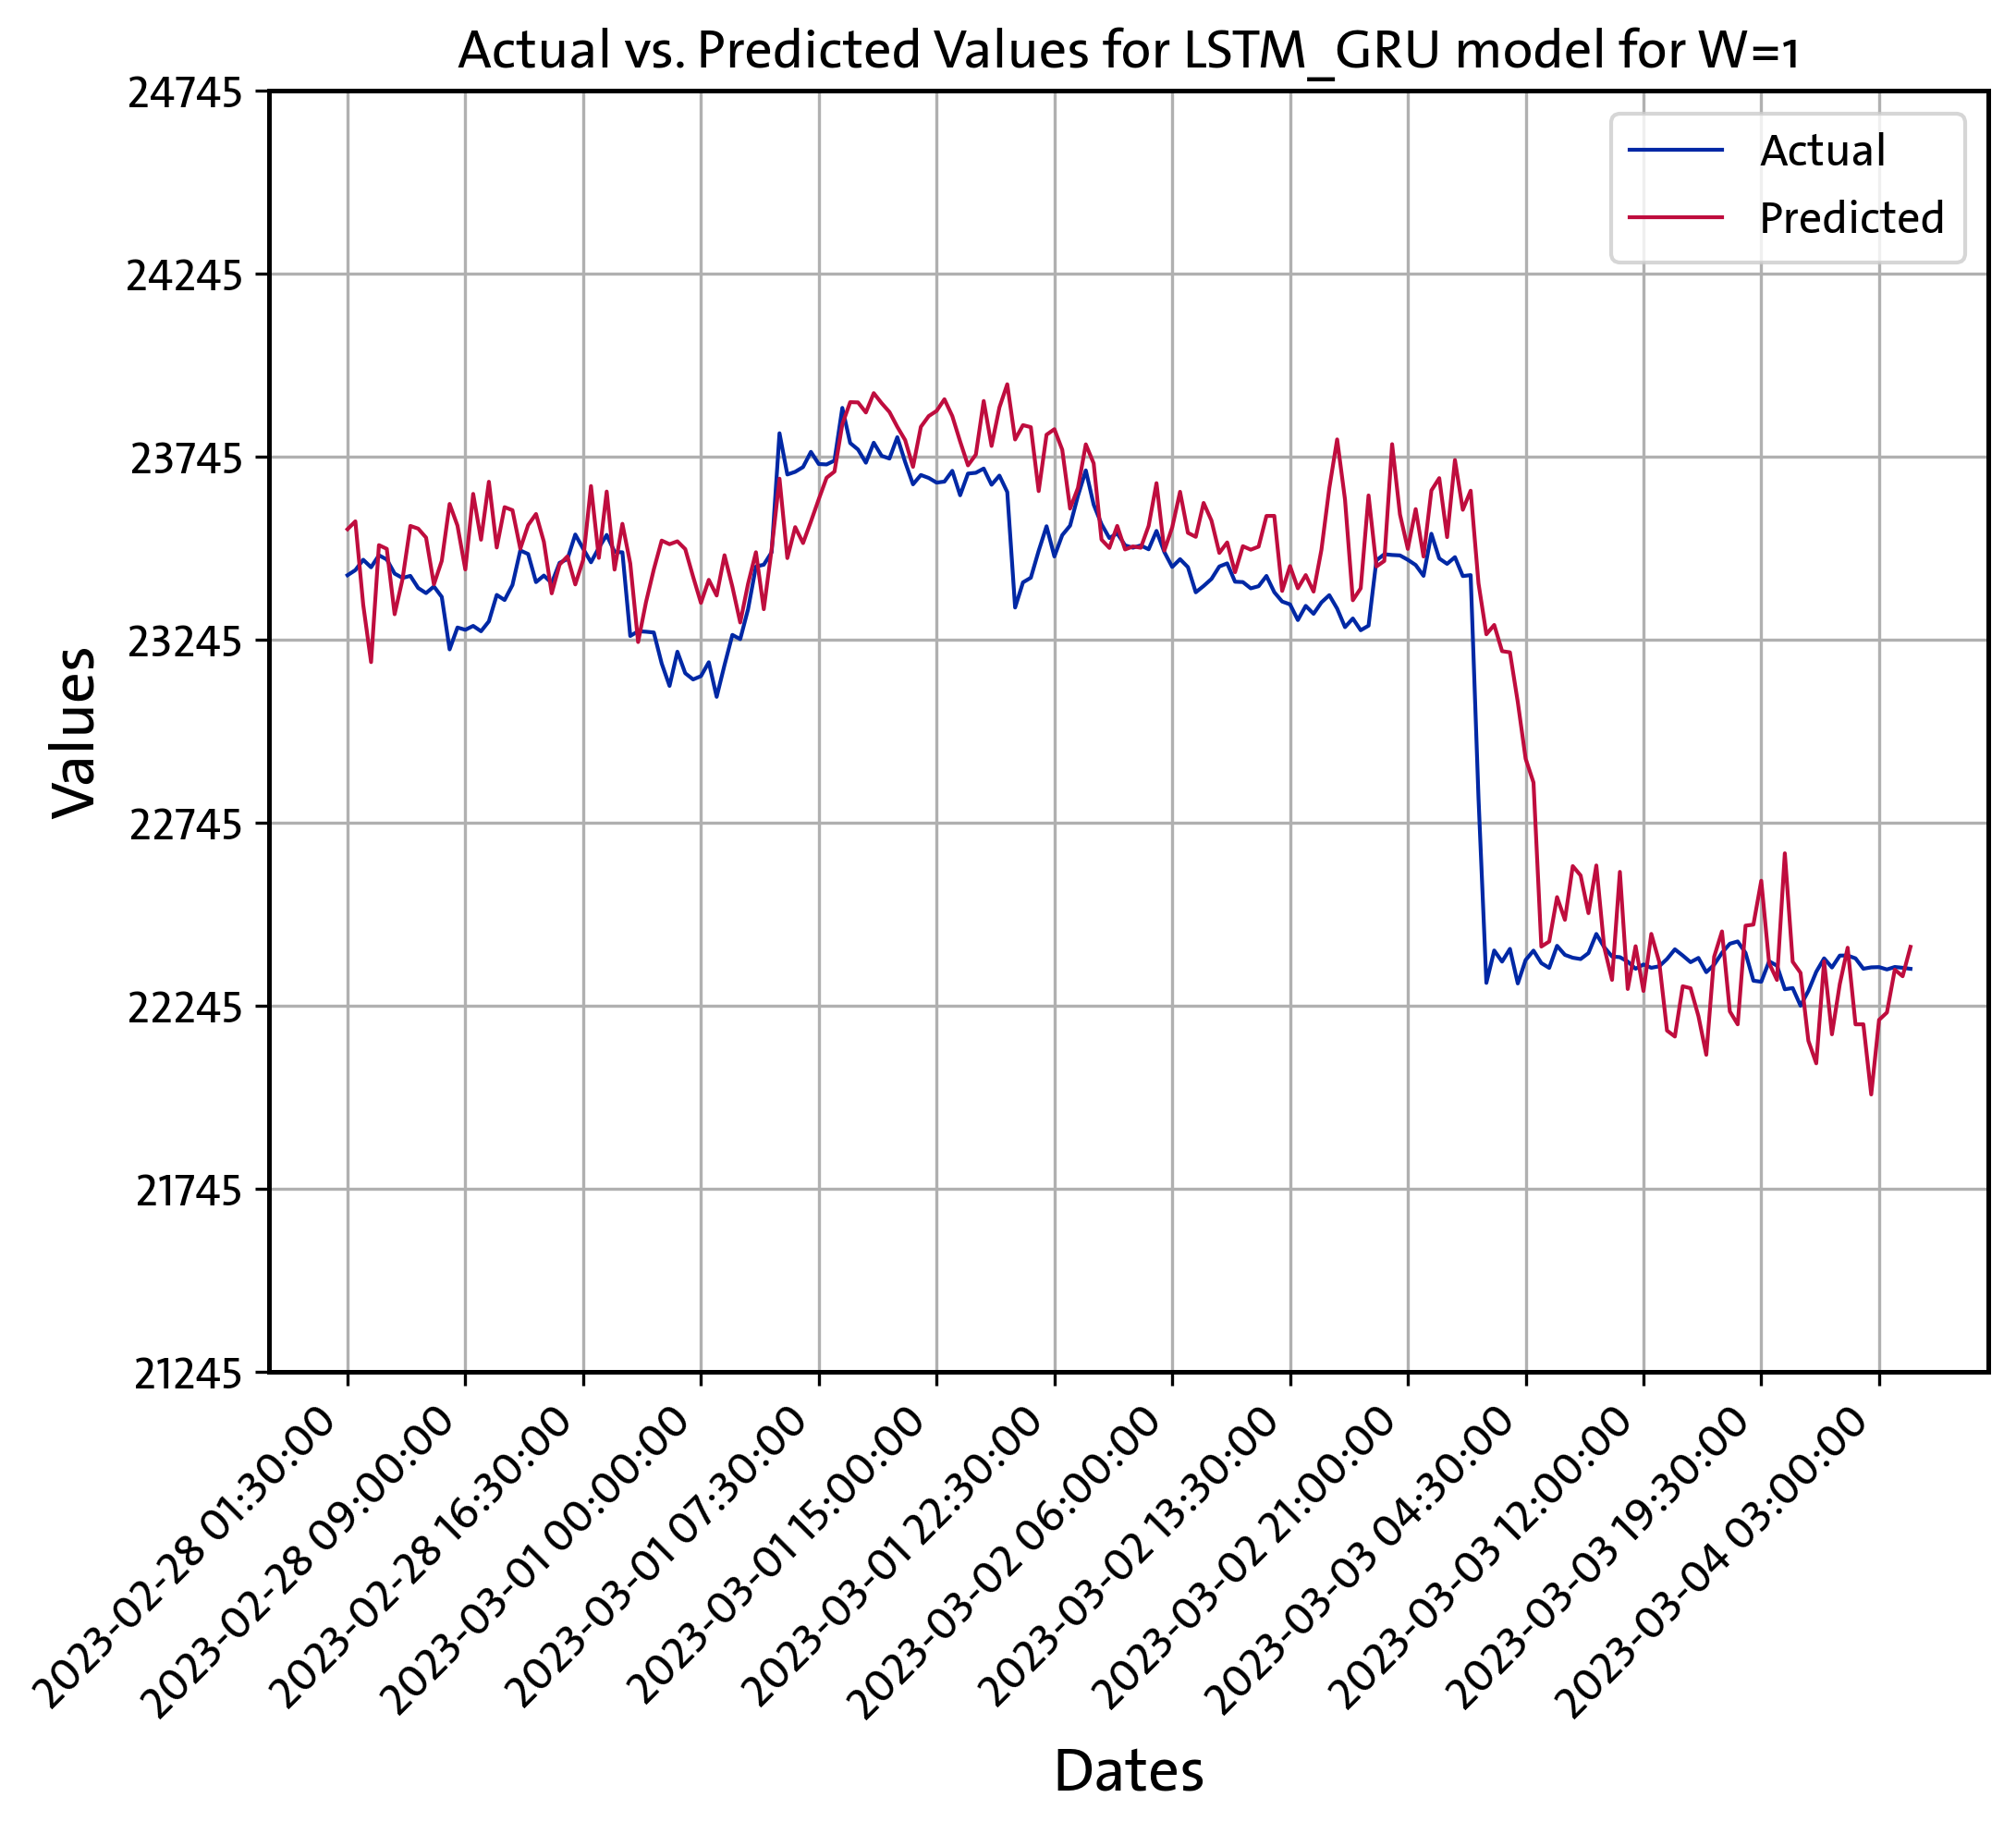

In [5]:
network_name = 'LSTM_GRU'
processed = True
sentiment_past = 30
price_past = 30
time_forecast = 0
get_predictions(network_name, sentiment_past, price_past, time_forecast, processed)

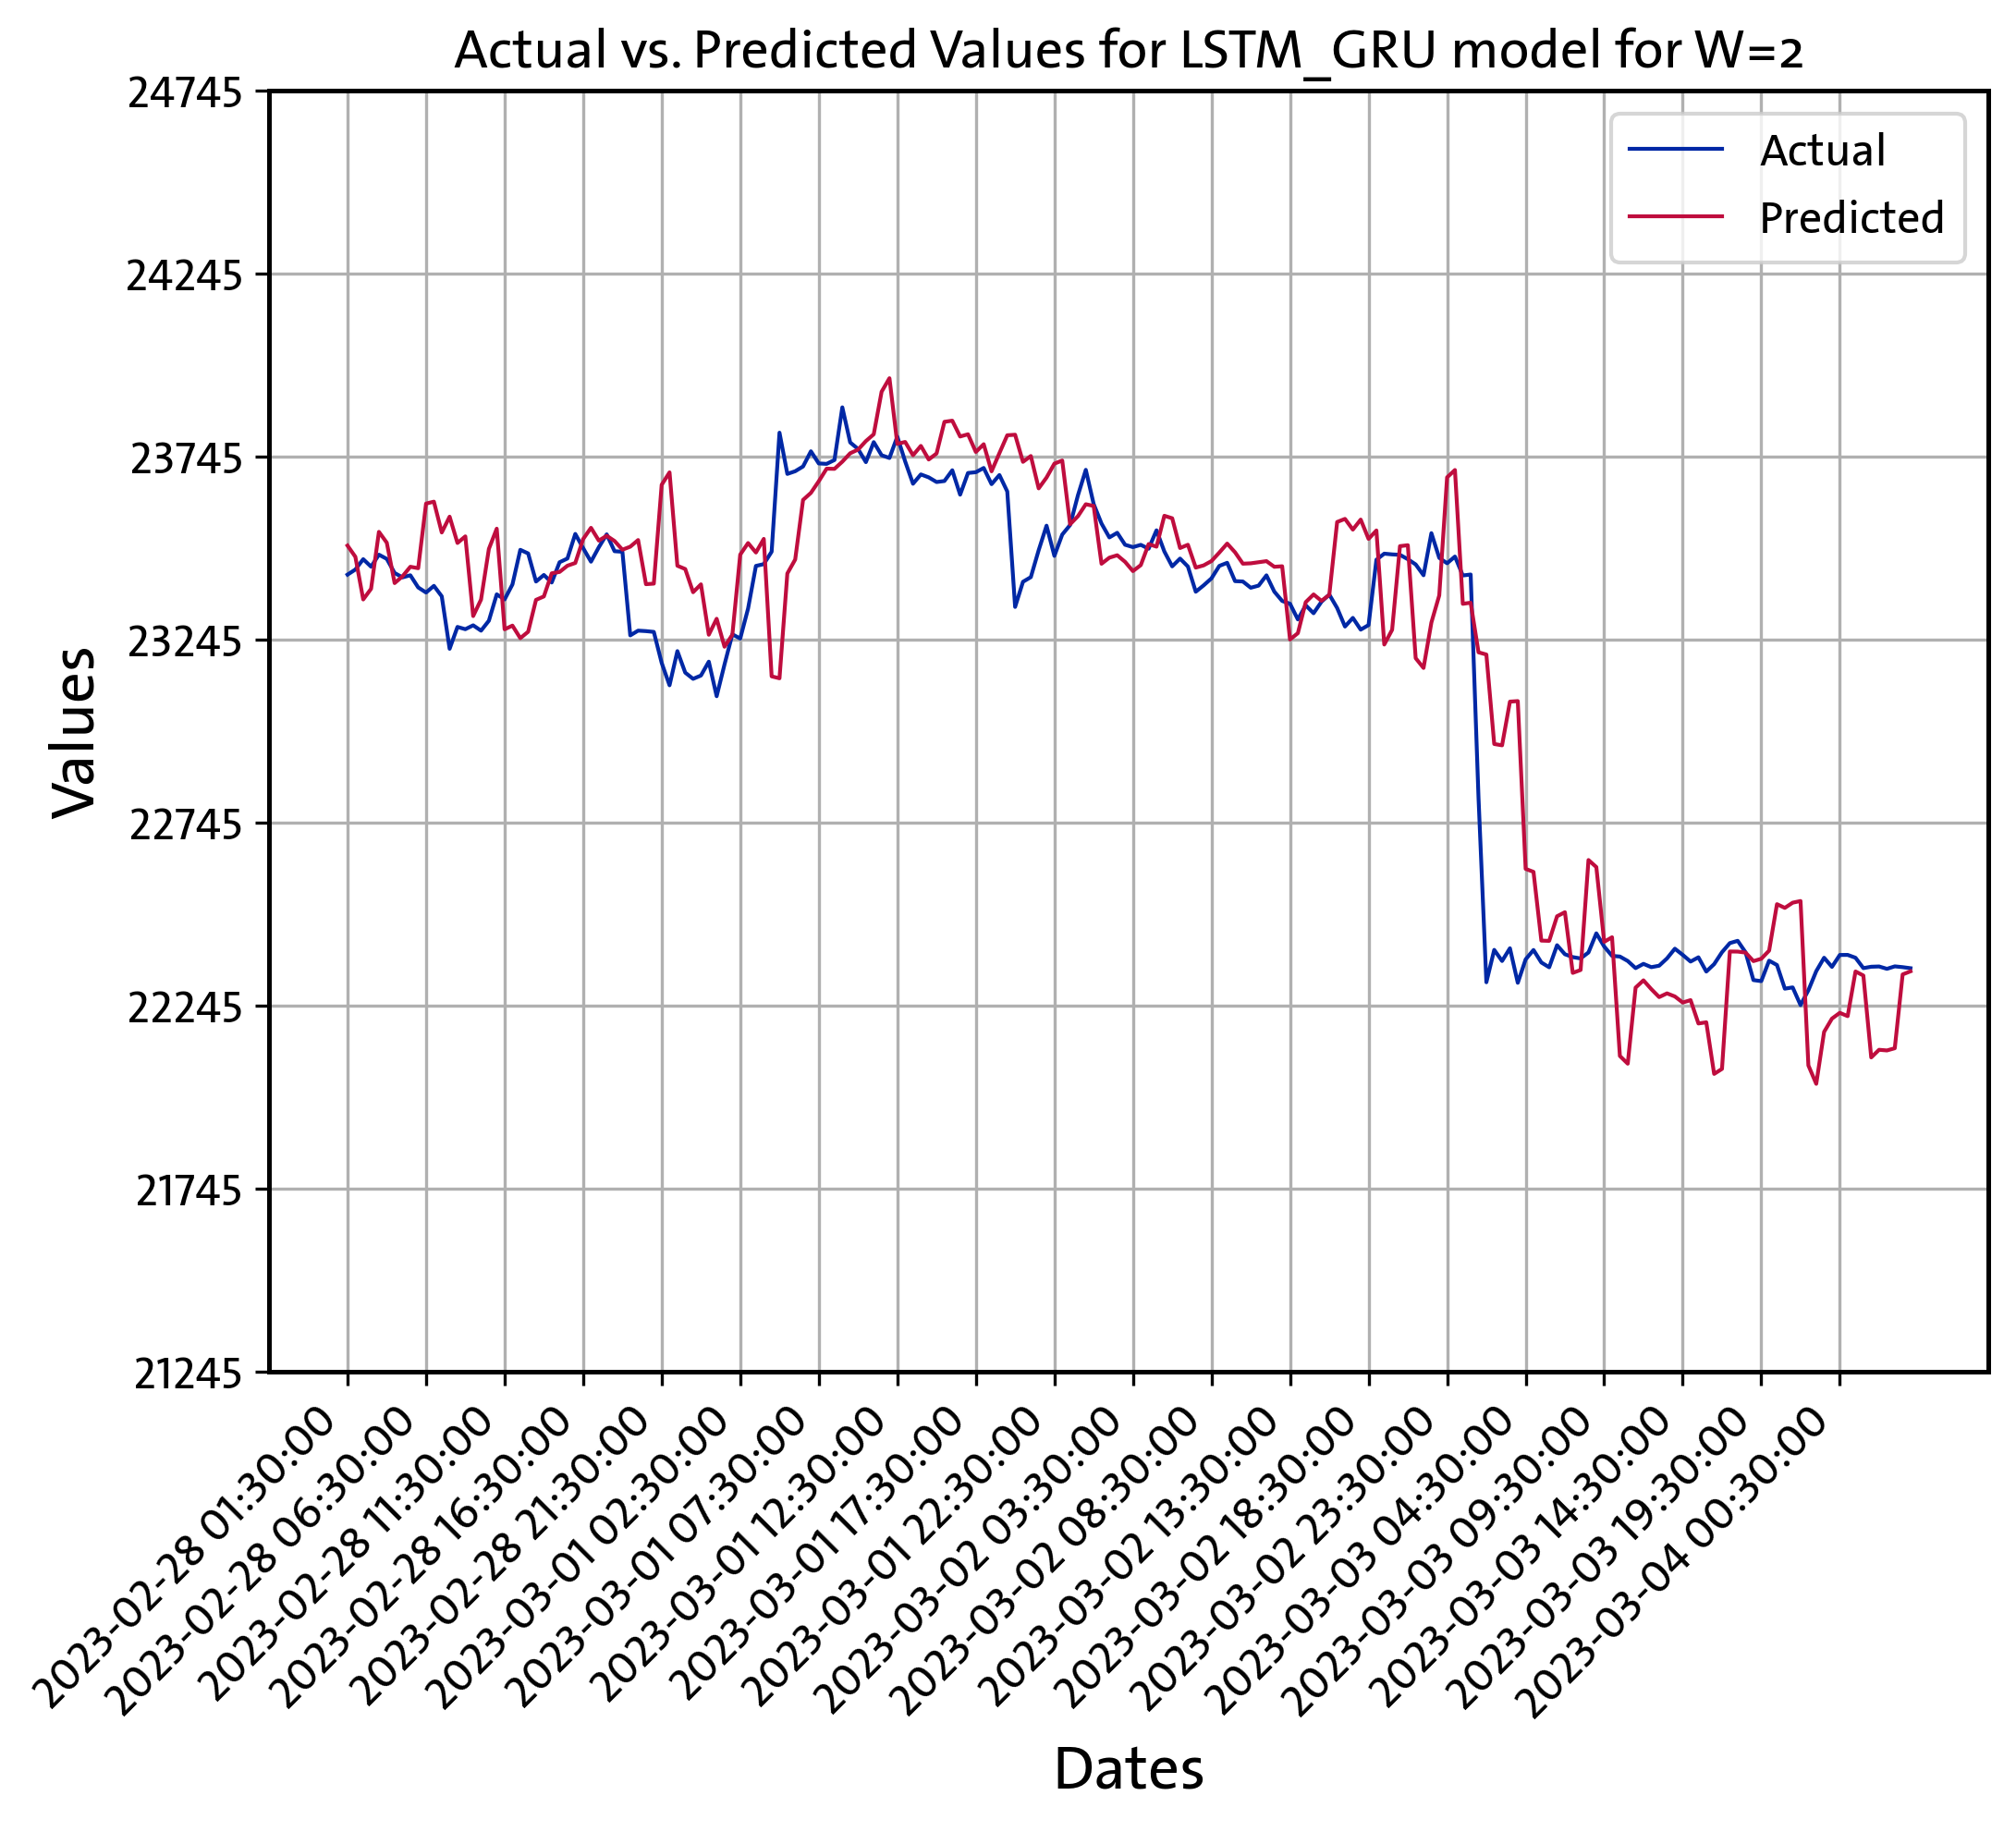

In [6]:
network_name = 'LSTM_GRU'
processed = True
sentiment_past = 30
price_past = 30
time_forecast = 1
get_predictions(network_name, sentiment_past, price_past, time_forecast, processed)

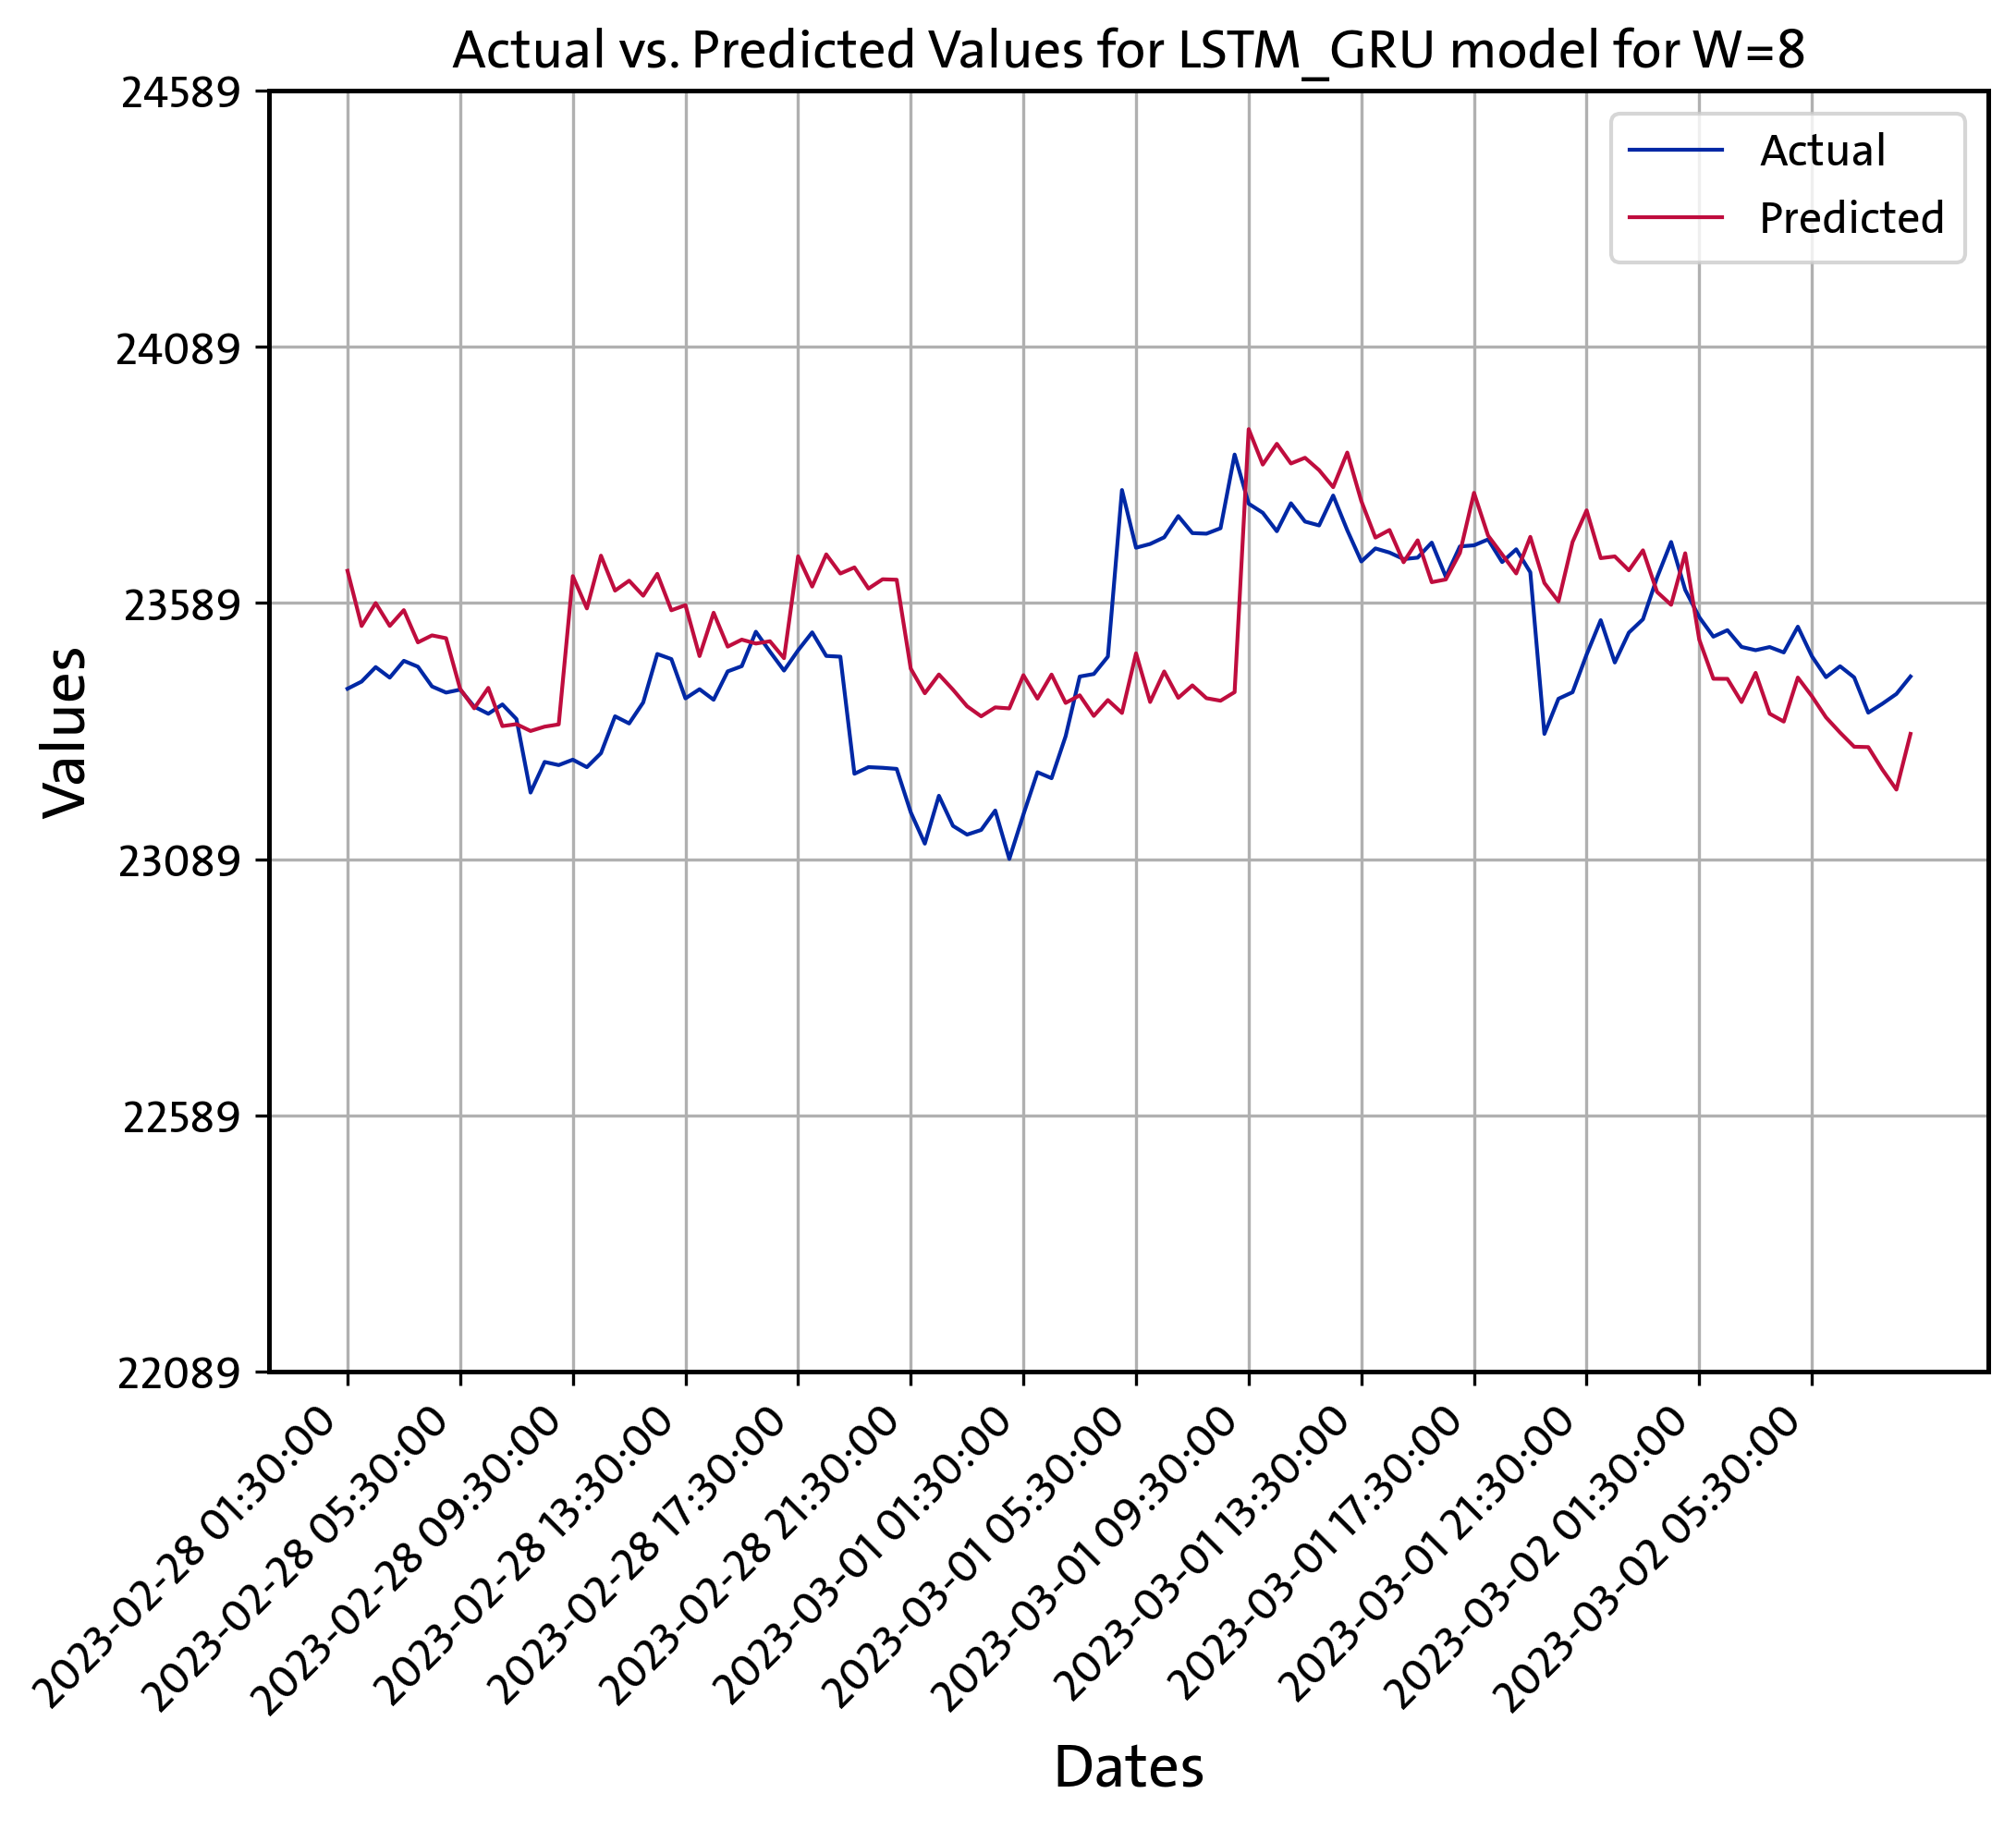

In [7]:
network_name = 'LSTM_GRU'
processed = True
sentiment_past = 30
price_past = 30
time_forecast = 7
get_predictions(network_name, sentiment_past, price_past, time_forecast, processed)